<a href="https://colab.research.google.com/github/veldahung/ML_JohnHullC/blob/main/Iowa_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Imports
!wget "https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py"

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from utils import display_side_by_side, DataLoader

np.random.seed(3)

--2023-08-10 04:22:52--  https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/YI-CHENG-SHIH645/ML_Intro/raw/master/utils.py [following]
--2023-08-10 04:22:52--  https://github.com/YI-CHENG-SHIH645/ML_Intro/raw/master/utils.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML_Intro/master/utils.py [following]
--2023-08-10 04:22:52--  https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML_Intro/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request se

# Regularization


In [2]:
#@title load iowa house price data
iowa_scaled_df = DataLoader.load_data('iowa_reduced_scaled')
iowa_original_df = DataLoader.load_data('iowa_original')

In [3]:
train = iowa_scaled_df .iloc[:1800]
val =iowa_scaled_df .iloc[1800:2400]
test=iowa_scaled_df .iloc[2400:2908]

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val,X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val,y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]

In [5]:
# @title LinearRegression
from sklearn.linear_model import LinearRegression

iowa_scaled_df = DataLoader.load_data('iowa_reduced_scaled')
iowa_original_df = DataLoader.load_data('iowa_original')

train = iowa_scaled_df .iloc[:1800]
val =iowa_scaled_df .iloc[1800:2400]
test=iowa_scaled_df .iloc[2400:2908]

# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val,X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val,y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]


In [6]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_t=lr.predict(X_train)
print(mse(y_train,pred_t))
pred=lr.predict(X_val)
print(mse(y_val,pred))

0.11401526431246334
0.11702499460121653


In [7]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.079
OverallQual,0.214395
OverallCond,0.096479
YearBuilt,0.160799
YearRemodAdd,0.025352
BsmtFinSF1,0.091466
BsmtUnfSF,-0.03308
TotalBsmtSF,0.138199


In [8]:
#@title Ridge
from sklearn.linear_model import Ridge

In [23]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0, 0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800,0.0525*1800,0.053*1800, 0.054*1800, 0.055*1800, 0.0555*1800, 0.05575*1800, 0.056*1800, 0.0575*1800, 0.06*1800, 0.07*1800, 0.08*1800, 0.09*1800, 0.1*1800,0.2*1800, 0.6*1800, 1.0*1800]
msev=[]
mset=[]
msed=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    ridge.fit(X_train,y_train)
    pred_t=ridge.predict(X_train)
    mset.append(mse(y_train,pred_t))
    pred=ridge.predict(X_val)
    msev.append(mse(y_val,pred))
    #print(mse(y_train,pred_t))
    #print(mse(y_val,pred))
    #print(mse(y_train,pred_t)-mse(y_val,pred))
    msed.append(mse(y_val,pred)-mse(y_train,pred_t))

lambdas=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.0525,0.053, 0.054, 0.055, 0.0555, 0.05575, 0.056, 0.0575, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.6, 1.0]


dr = {"training": mset, "validation": msev, "difference": msed}
dfr = pd.DataFrame(data=dr, index=lambdas)
display(dfr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53461e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53461e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,training,validation,difference
0.00000,0.114015,0.117025,0.003010
0.01000,0.114064,0.117033,0.002969
0.02000,0.114176,0.117108,0.002932
0.03000,0.114333,0.117240,0.002906
0.04000,0.114524,0.117415,0.002890
0.05000,0.114741,0.117624,0.002883
0.05250,0.114798,0.117681,0.002883
0.05300,0.114810,0.117692,0.002882
0.05400,0.114833,0.117716,0.002882
0.05500,0.114857,0.117739,0.002882


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dfr, *['training'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dfr, *['validation'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dfr, *['difference'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfr, *['training'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfr, *['validation'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfr, *['difference'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dfr, *[[['training', 'validation'], ['validation', 'difference']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfr, *['training', 'difference', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfr, *['training', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfr, *['validation', 'difference', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfr, *['validation', 'count()', None], **{})
chart

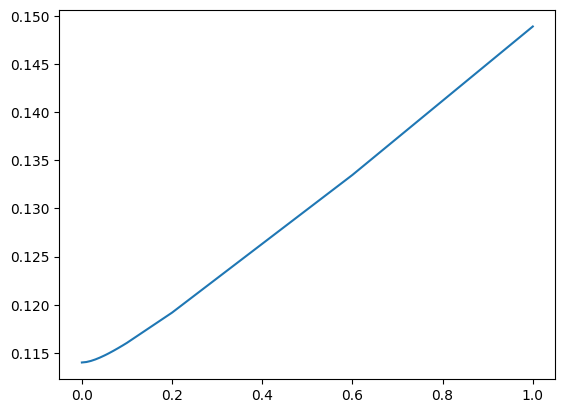

In [10]:
plt.plot(lambdas, mset)

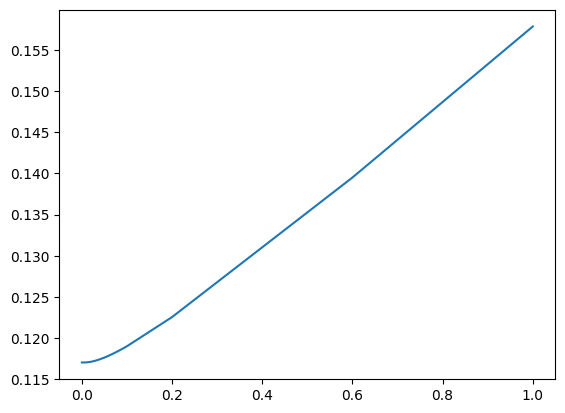

In [11]:
plt.plot(lambdas, msev)

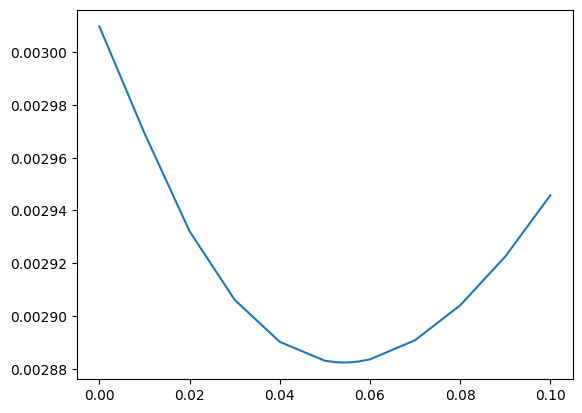

In [12]:
plt.plot(lambdas[:19], msed[:19])

In [13]:
#@title Lasso
from sklearn.linear_model import Lasso

In [14]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[ 0, 0.001/2, 0.0025/2, 0.005/2, 0.0075/2, 0.01/2, 0.0125/2,0.015/2,0.016/2,0.01635/2,0.01635/2,0.0164/2,0.01645/2,0.0165/2,0.0166/2,0.01675/2,0.017/2,0.0175/2,0.018/2,0.02/2,0.025/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
msev=[]
mset=[]
msed=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred_t=lasso.predict(X_train)
    mset.append(mse(y_train,pred_t))
    pred=lasso.predict(X_val)
    msev.append(mse(y_val,pred))
    #print(mse(y_train, pred_t))
    #print(mse(y_val, pred))
    #print(mse(y_train, pred_t)-mse(y_val, pred))
    msed.append(abs(mse(y_val,pred)-mse(y_train,pred_t)))

lambdas=[ 0, 0.001, 0.0025, 0.005, 0.0075, 0.01,0.0125,0.015,0.016,0.01625,0.01635,0.0164,0.01645,0.0165,0.0166,0.01675, 0.017,0.0175,0.018,0.02,0.025, 0.03, 0.04, 0.05, 0.075, 0.1]

dl = {"training": mset, "validation": msev, "difference": msed}
dfl = pd.DataFrame(data=dl, index=lambdas)
display(dfl)

lasso=Lasso(alpha=0.0163/2)
lasso.fit(X_train,y_train)
pred_t=lasso.predict(X_train)
pred=lasso.predict(X_val)
print(abs(mse(y_val,pred)-mse(y_train,pred_t)))


<ipython-input-14-a44778325c9c>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+02, tolerance: 1.799e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,training,validation,difference
0.00000,0.114015,0.117025,0.003010
0.00100,0.114037,0.116893,0.002855
0.00250,0.114157,0.116761,0.002603
0.00500,0.114560,0.116704,0.002144
0.00750,0.114942,0.116625,0.001683
0.01000,0.115353,0.116548,0.001195
0.01250,0.115764,0.116470,0.000706
0.01500,0.116261,0.116499,0.000239
0.01600,0.116485,0.116539,0.000054
0.01625,0.116566,0.116557,0.000010


6.605288687538957e-07


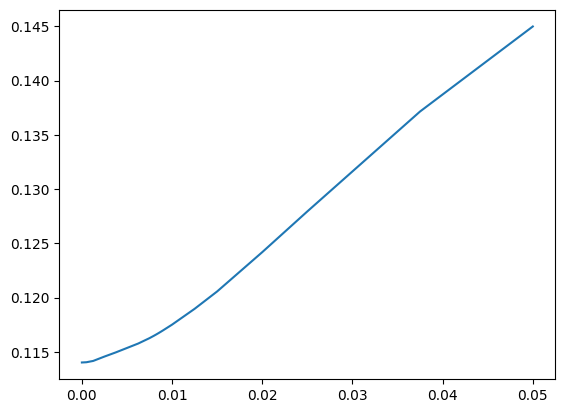

In [15]:
plt.plot(alphas, mset)

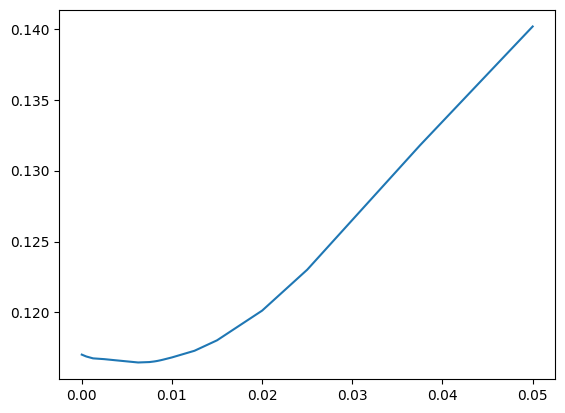

In [16]:
plt.plot(alphas, msev)

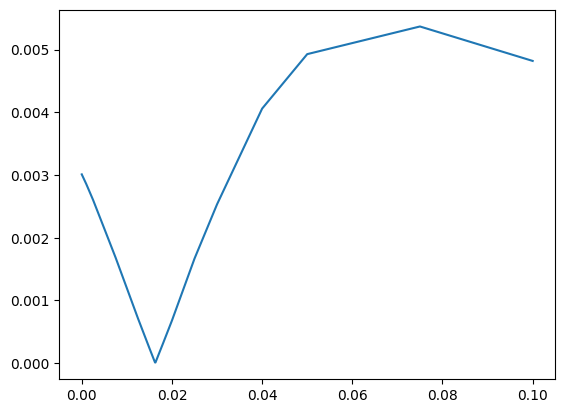

In [17]:
plt.plot(lambdas, msed)

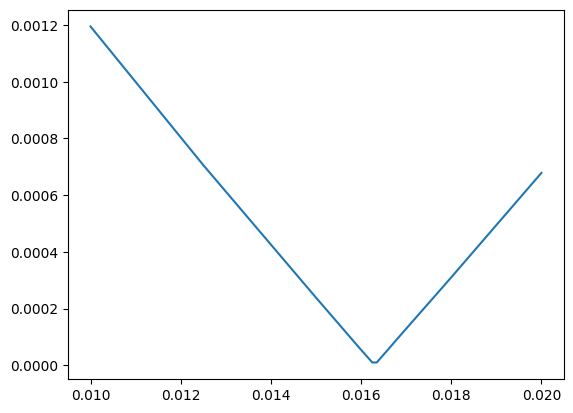

In [18]:
plt.plot(lambdas[5:20], msed[5:20])

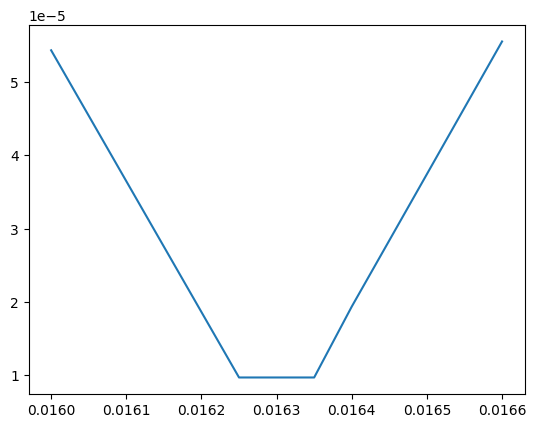

In [19]:
plt.plot(lambdas[8:15], msed[8:15])

In [20]:
#@title Elastic Net
from sklearn.linear_model import ElasticNet

<ipython-input-27-48a8c8048de4>:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+02, tolerance: 1.799e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-27-48a8c8048de4>:23: UserW

,training,validation,difference
0.00,0.114015,0.117025,0.003010
0.01,0.114486,0.116663,0.002177
0.02,0.115397,0.116651,0.001254
0.03,0.116363,0.116694,0.000331
0.04,0.117654,0.117153,0.000501
0.05,0.119131,0.117741,0.001390
0.06,0.120791,0.118610,0.002182
0.07,0.122578,0.119699,0.002879
0.08,0.124433,0.120936,0.003497
0.09,0.126398,0.122378,0.004020


Ridge Lasso Elastic Net 
 
 
 
 training 
 validation 
 difference 
 
 
 
 
 0.00 
 0.114015 
 0.117025 
 0.003010 
 
 
 0.01 
 0.114064 
 0.117033 
 0.002969 
 
 
 0.02 
 0.114176 
 0.117108 
 0.002932 
 
 
 0.03 
 0.114333 
 0.117240 
 0.002906 
 
 
 0.04 
 0.114524 
 0.117415 
 0.002890 
 
 
 0.05 
 0.114741 
 0.117624 
 0.002883 
 
 
 0.06 
 0.114977 
 0.117861 
 0.002884 
 
 
 0.07 
 0.115229 
 0.118120 
 0.002891 
 
 
 0.08 
 0.115494 
 0.118398 
 0.002904 
 
 
 0.09 
 0.115770 
 0.118693 
 0.002923 
 
 
 0.10 
 0.116055 
 0.119001 
 0.002946 
 
 
 
 
 
 
 training 
 validation 
 difference 
 
 
 
 
 0.00 
 0.114015 
 0.117025 
 0.003010 
 
 
 0.01 
 0.115353 
 0.116548 
 0.001195 
 
 
 0.02 
 0.117505 
 0.116827 
 0.000678 
 
 
 0.03 
 0.120566 
 0.118033 
 0.002532 
 
 
 0.04 
 0.124187 
 0.120128 
 0.004059 
 
 
 0.05 
 0.127943 
 0.123015 
 0.004927 
 
 
 0.06 
 0.131663 
 0.126462 
 0.005201 
 
 
 0.07 
 0.135484 
 0.130133 
 0.005352 
 
 
 0.08 
 0.138882 
 0.133492 
 0.005390 
 
 
 0.09 
 0.142316 
 0.137016 
 0.005300 
 
 
 0.10 
 0.144991 
 0.140172 
 0.004819 
 
 
 
 
 
 
 training 
 validation 
 difference 
 
 
 
 
 0.00 
 0.114015 
 0.117025 
 0.003010 
 
 
 0.01 
 0.114486 
 0.116663 
 0.002177 
 
 
 0.02 
 0.115397 
 0.116651 
 0.001254 
 
 
 0.03 
 0.116363 
 0.116694 
 0.000331 
 
 
 0.04 
 0.117654 
 0.117153 
 0.000501 
 
 
 0.05 
 0.119131 
 0.117741 
 0.001390 
 
 
 0.06 
 0.120791 
 0.118610 
 0.002182 
 
 
 0.07 
 0.122578 
 0.119699 
 0.002879 
 
 
 0.08 
 0.124433 
 0.120936 
 0.003497 
 
 
 0.09 
 0.126398 
 0.122378 
 0.004020 
 
 
 0.10 
 0.128535 
 0.124028 
 0.004507

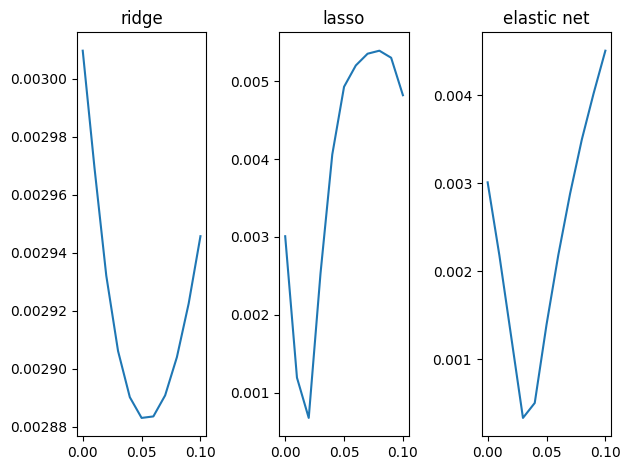

In [27]:
#try different alphas
alphas=[ 0, 0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.06/2, 0.07/2, 0.08/2, 0.09/2 ,0.1/2]
alphasr=[0,0.01*1800,0.02*1800,0.03*1800,0.04*1800,0.05*1800,0.06*1800,0.07*1800,0.08*1800,0.09*1800,0.1*1800]
l1s=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mseve=[]
msete=[]
msede=[]
msevr=[]
msetr=[]
msedr=[]
msevl=[]
msetl=[]
msedl=[]
for alpha in alphas:
    elastic=ElasticNet(alpha=alpha,l1_ratio=0.5)
    elastic.fit(X_train,y_train)
    pred_t=elastic.predict(X_train)
    msete.append(mse(y_train,pred_t))
    pred=elastic.predict(X_val)
    mseve.append(mse(y_val,pred))
    msede.append(abs(mse(y_val,pred)-mse(y_train,pred_t)))
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred_t=lasso.predict(X_train)
    msetl.append(mse(y_train,pred_t))
    pred=lasso.predict(X_val)
    msevl.append(mse(y_val,pred))
    msedl.append(abs(mse(y_val,pred)-mse(y_train,pred_t)))

for alpha in alphasr:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    ridge.fit(X_train,y_train)
    pred_t=ridge.predict(X_train)
    msetr.append(mse(y_train,pred_t))
    pred=ridge.predict(X_val)
    msevr.append(mse(y_val,pred))
    msedr.append(mse(y_val,pred)-mse(y_train,pred_t))

lambdas=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

de = {"training": msete, "validation": mseve, "difference": msede}
dfe = pd.DataFrame(data=de, index=lambdas)
display(dfe)
dr = {"training": msetr, "validation": msevr, "difference": msedr}
dfr = pd.DataFrame(data=dr, index=lambdas)
dl = {"training": msetl, "validation": msevl, "difference": msedl}
dfl = pd.DataFrame(data=dl, index=lambdas)

display_side_by_side([dfr,dfl,dfe],['Ridge','Lasso','Elastic Net'])

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
ax1.plot(lambdas, msedr)
ax1.set_title("ridge")
ax2.plot(lambdas, msedl)
ax2.set_title("lasso")
ax3.plot(lambdas, msede)
ax3.set_title("elastic net")
fig.tight_layout()

In [32]:
#try different l1_ratio
mseve=[]
msete=[]
msede=[]
for l1 in l1s:
    elastic=ElasticNet(alpha=0.03/2,l1_ratio=l1)
    elastic.fit(X_train,y_train)
    pred_t=elastic.predict(X_train)
    msete.append(mse(y_train,pred_t))
    pred=elastic.predict(X_val)
    mseve.append(mse(y_val,pred))
    msede.append(abs(mse(y_val,pred)-mse(y_train,pred_t)))

de = {"training": msete, "validation": mseve, "difference": msede}
dfe = pd.DataFrame(data=de, index=l1s)
display(dfe)

ridge=Ridge(alpha=0.03*1800/2)
ridge.fit(X_train,y_train)
pred_t=ridge.predict(X_train)
pred=ridge.predict(X_val)
print("Ridge :  training "+ str((mse(y_train,pred_t)))+" , validation "+str((mse(y_val,pred)))+" , validation "+str((mse(y_val,pred)-mse(y_train,pred_t))))

lasso=Lasso(alpha=0.03/2)
lasso.fit(X_train,y_train)
pred_t=lasso.predict(X_train)
pred=lasso.predict(X_val)
print("Lasso :  training "+ str((mse(y_train,pred_t)))+" , validation "+str((mse(y_val,pred)))+" , validation "+str(abs((mse(y_val,pred)-mse(y_train,pred_t)))))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+02, tolerance: 1.799e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,training,validation,difference
0.0,0.114113,0.117062,0.002949
0.1,0.114317,0.116862,0.002545
0.2,0.114712,0.116752,0.002040
0.3,0.115226,0.116732,0.001506
0.4,0.115796,0.116689,0.000893
0.5,0.116363,0.116694,0.000331
0.6,0.117053,0.116836,0.000217
0.7,0.117836,0.117061,0.000775
0.8,0.118677,0.117274,0.001403
0.9,0.119590,0.117602,0.001988


Ridge :  training 0.11411309568525259 , validation 0.11706238858900017 , validation 0.002949292903747583
Lasso :  training 0.12056553041139254 , validation 0.11803348353132033 , validation 0.0025320468800722057


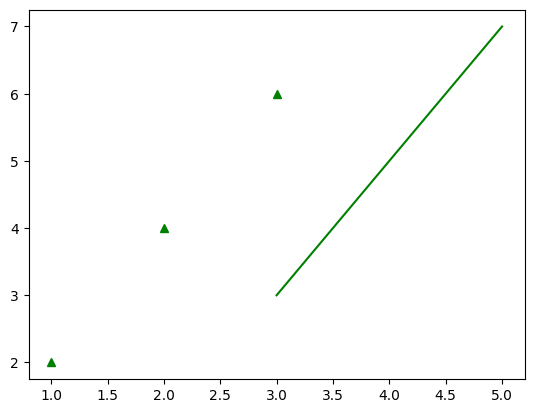

In [22]:
x1=[1,2,3]
x2=[3,4,5]
y1=[2,4,6]
y2=[3,5,7]
plt.plot(x1, y1, 'g^', x2, y2, 'g-')